# Demo of synthetic data

Using the example from the [DataSynthesizer Github](https://github.com/DataResponsibly/DataSynthesizer/blob/master/notebooks/DataSynthesizer__correlated_attribute_mode.ipynb) applied to the [Student Performance set](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

In [1]:
# import pandas
import pandas as pd

# import modules from DataSynthesizer
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

### Load the data

In [2]:
input_file = 'Data/Student/student-por.csv'
df = pd.read_csv(input_file)

# plot data for demo
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
# use only certain columns to increase readability
preferred_columns = ['school', 'sex', 'age', 'address','famsize', 'Mjob', 'Fjob', 'absences', 'traveltime', 'G1', 'G2', 'G3']

df[preferred_columns]

,school,sex,age,address,famsize,Mjob,Fjob,absences,traveltime,G1,G2,G3
0,GP,F,18,U,GT3,at_home,teacher,4,2,0,11,11
1,GP,F,17,U,GT3,at_home,other,2,1,9,11,11
2,GP,F,15,U,LE3,at_home,other,6,1,12,13,12
3,GP,F,15,U,GT3,health,services,0,1,14,14,14
4,GP,F,16,U,GT3,other,other,0,1,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,services,other,4,1,10,11,10
645,MS,F,18,U,LE3,teacher,services,4,1,15,15,16
646,MS,F,18,U,GT3,other,other,6,2,11,12,9
647,MS,M,17,U,LE3,services,services,6,2,10,10,10


## Let's create synthetic data!

![alt text](Images/SynthOverview.png "Overview of DataSynthesizer")

### Settings for our DataSynthesizer

In [4]:
# preferred mode of synthetic data generation 
mode = 'correlated_attribute_mode'
threshold_value = 42 # column is labeled as categorical value if domain size < threshold

# specify categorical attributes
categorical_attributes = {'school':True, 'sex':True, 'address':True, 'famsize':True, 'Mjob': True,  'Fjob': True}

epsilon = 0 # amount of noise we wish to introduce into our model
"""
Epsilon
A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
"""

# storing the output
description_file = f'./Data/Student/description_student.json' # file that contains the description of our synthetic data
synthetic_data = f'./Data/Student/student_synthetic_data.csv' # storing our synthetic data

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = len(df) # create equal amount of new rows

### DataDescriber

In [5]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_file, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT freetime
Adding attribute goout
Adding attribute G3
Adding attribute G2
Adding attribute G1
Adding attribute absences
Adding attribute age
Adding attribute Walc
Adding attribute Dalc
Adding attribute health
Adding attribute Mjob
Adding attribute Medu
Adding attribute Fedu
Adding attribute famrel
Adding attribute Fjob
Adding attribute studytime
Adding attribute reason
Adding attribute failures
Adding attribute traveltime
Adding attribute school
Adding attribute guardian
Adding attribute higher
Adding attribute address
Adding attribute sex
Adding attribute activities
Adding attribute internet
Adding attribute Pstatus
Adding attribute romantic
Adding attribute famsize
Adding attribute famsup
Adding attribute nursery
Adding attribute schoolsup
Adding attribute paid
========================== BN constructed ==========================


In [6]:
# display network
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    goout      has parents ['freetime'].
    G3         has parents ['goout', 'freetime'].
    G2         has parents ['G3', 'freetime'].
    G1         has parents ['G2', 'freetime'].
    absences   has parents ['G1', 'G3'].
    age        has parents ['absences', 'G1'].
    Walc       has parents ['absences', 'G2'].
    Dalc       has parents ['Walc', 'G3'].
    health     has parents ['absences', 'G1'].
    Mjob       has parents ['absences', 'G3'].
    Medu       has parents ['Mjob', 'absences'].
    Fedu       has parents ['Medu', 'absences'].
    famrel     has parents ['absences', 'G1'].
    Fjob       has parents ['absences', 'G1'].
    studytime  has parents ['absences', 'G1'].
    reason     has parents ['absences', 'G3'].
    failures   has parents ['absences', 'G2'].
    traveltime has parents ['absences', 'G3'].
    school     has parents ['absences', 'G3'].
    guardian   has parents ['absences', 'G2'].
    higher     has parents ['absences',

### DataGenerator

In [7]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

## Result

In [8]:
synth_df = pd.read_csv(synthetic_data)
synth_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,MS,M,18,R,GT3,T,4,3,teacher,other,...,4,3,2,2,2,5,2,10,11,12
1,GP,F,15,U,GT3,A,3,3,services,services,...,1,4,5,1,2,1,24,9,9,9
2,MS,F,17,U,GT3,T,3,3,services,other,...,5,3,2,3,4,1,0,8,10,10
3,MS,F,16,R,GT3,T,3,1,other,other,...,4,3,3,1,5,3,5,13,12,13
4,MS,M,17,R,GT3,T,0,2,at_home,other,...,4,3,1,2,2,5,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,M,17,R,GT3,T,4,4,teacher,other,...,4,3,2,1,1,1,0,9,0,0
645,GP,F,18,U,LE3,A,2,1,services,other,...,4,2,2,1,3,4,10,14,17,17
646,MS,F,17,U,GT3,T,1,1,at_home,services,...,5,4,2,1,1,5,2,9,10,11
647,GP,F,17,U,GT3,T,4,4,teacher,other,...,2,4,4,1,1,5,5,9,10,11


In [9]:
df[preferred_columns]

,school,sex,age,address,famsize,Mjob,Fjob,absences,traveltime,G1,G2,G3
0,GP,F,18,U,GT3,at_home,teacher,4,2,0,11,11
1,GP,F,17,U,GT3,at_home,other,2,1,9,11,11
2,GP,F,15,U,LE3,at_home,other,6,1,12,13,12
3,GP,F,15,U,GT3,health,services,0,1,14,14,14
4,GP,F,16,U,GT3,other,other,0,1,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,services,other,4,1,10,11,10
645,MS,F,18,U,LE3,teacher,services,4,1,15,15,16
646,MS,F,18,U,GT3,other,other,6,2,11,12,9
647,MS,M,17,U,LE3,services,services,6,2,10,10,10


In [10]:
synth_df[preferred_columns]

,school,sex,age,address,famsize,Mjob,Fjob,absences,traveltime,G1,G2,G3
0,MS,M,18,R,GT3,teacher,other,2,2,10,11,12
1,GP,F,15,U,GT3,services,services,24,1,9,9,9
2,MS,F,17,U,GT3,services,other,0,2,8,10,10
3,MS,F,16,R,GT3,other,other,5,1,13,12,13
4,MS,M,17,R,GT3,at_home,other,0,3,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,M,17,R,GT3,teacher,other,0,2,9,0,0
645,GP,F,18,U,LE3,services,other,10,2,14,17,17
646,MS,F,17,U,GT3,at_home,services,2,1,9,10,11
647,GP,F,17,U,GT3,teacher,other,5,2,9,10,11


#  Now we have a synthetic data set based on the Student Performance set!

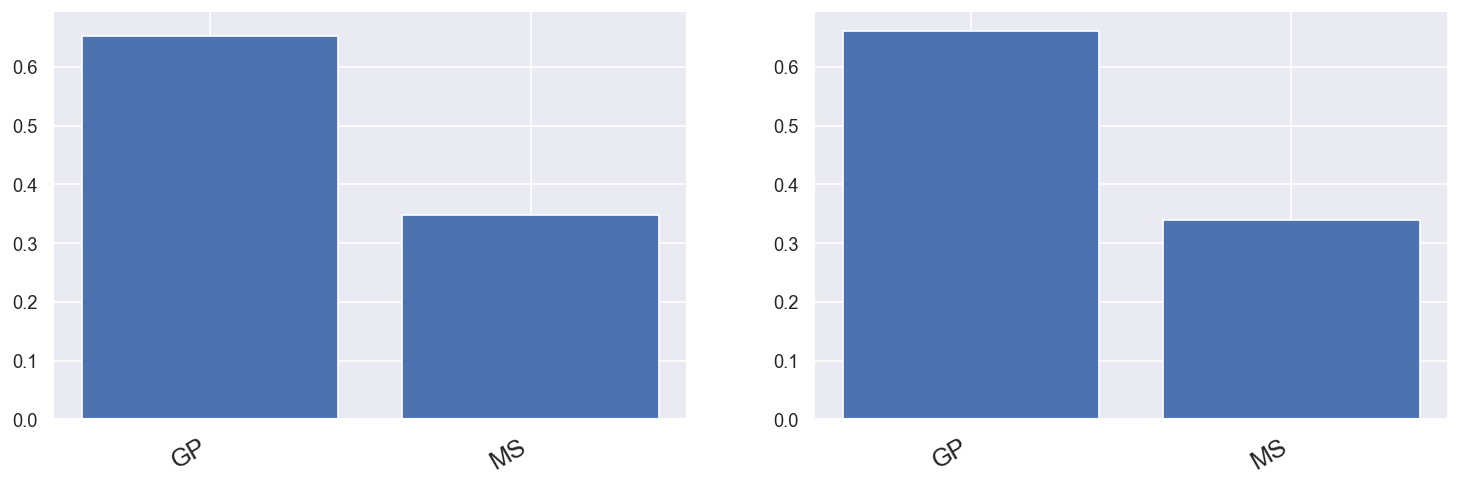

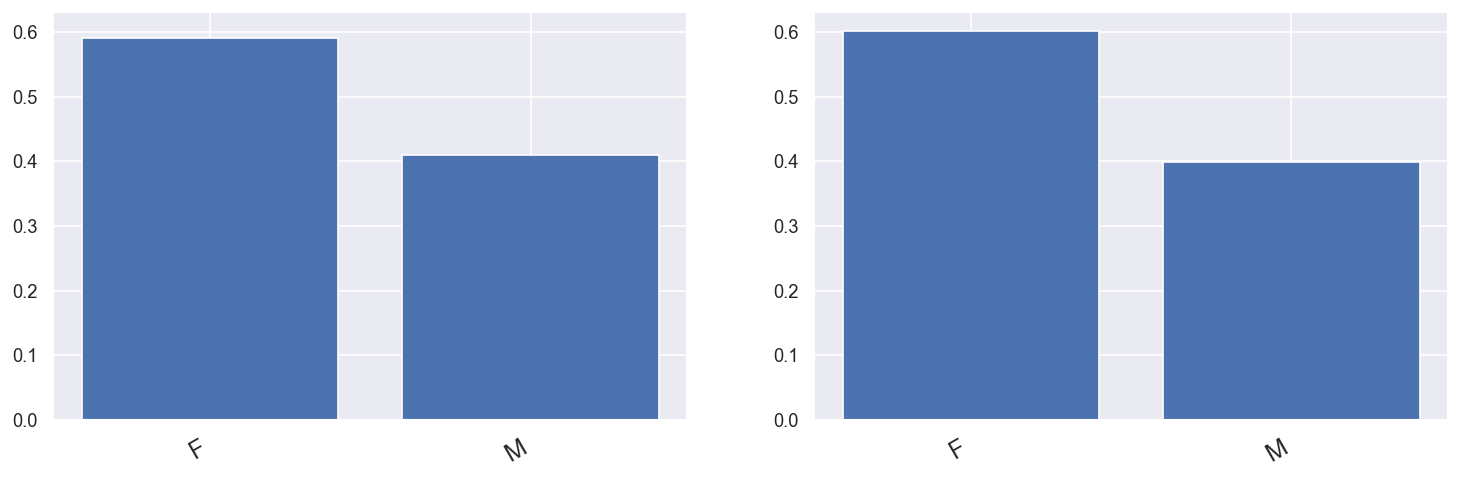

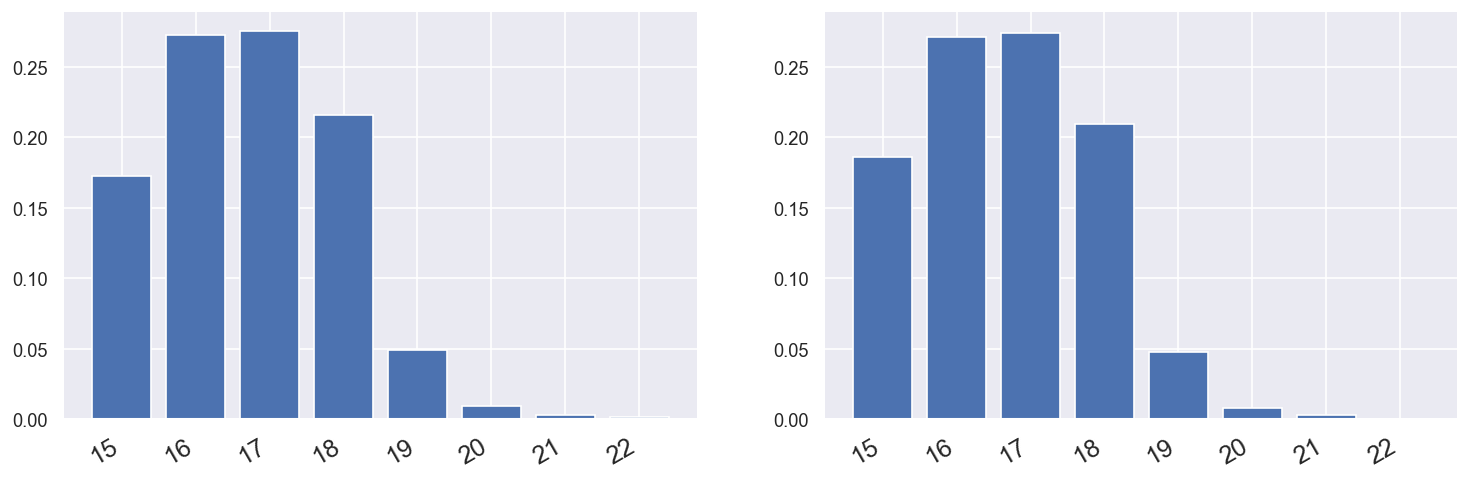

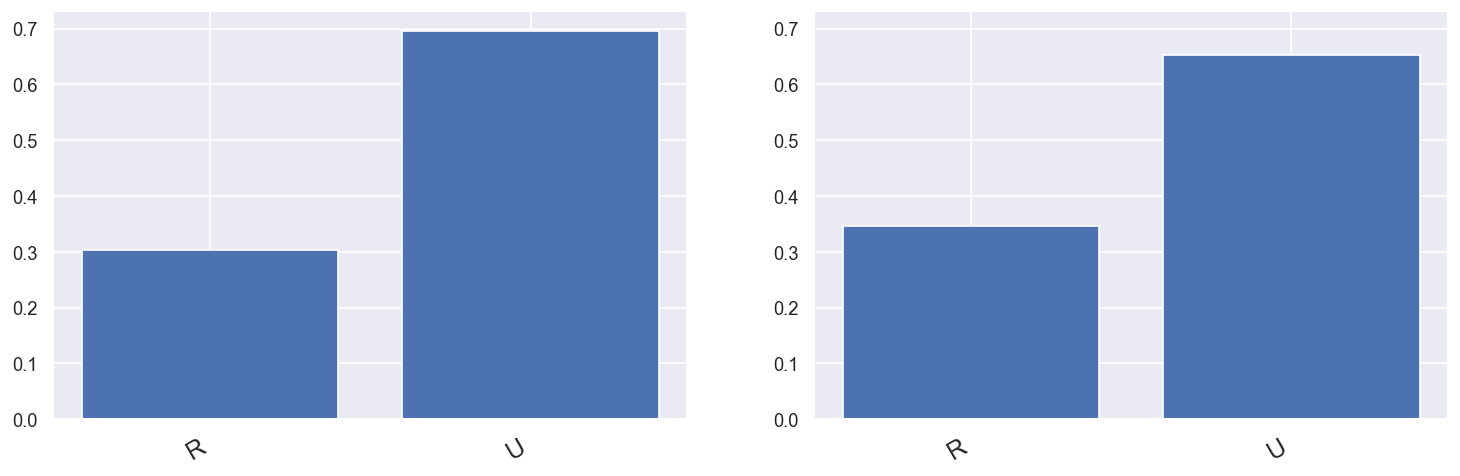

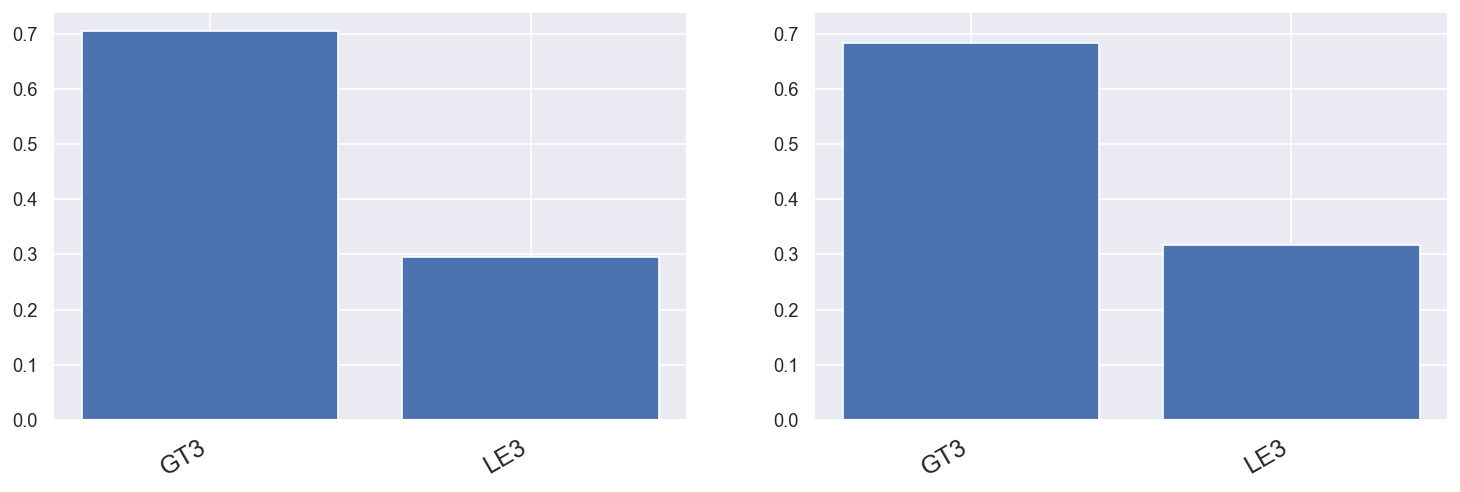

In [11]:
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(df, synth_df, attribute_description)

for attribute in synth_df.columns[:5]:
    inspector.compare_histograms(attribute)

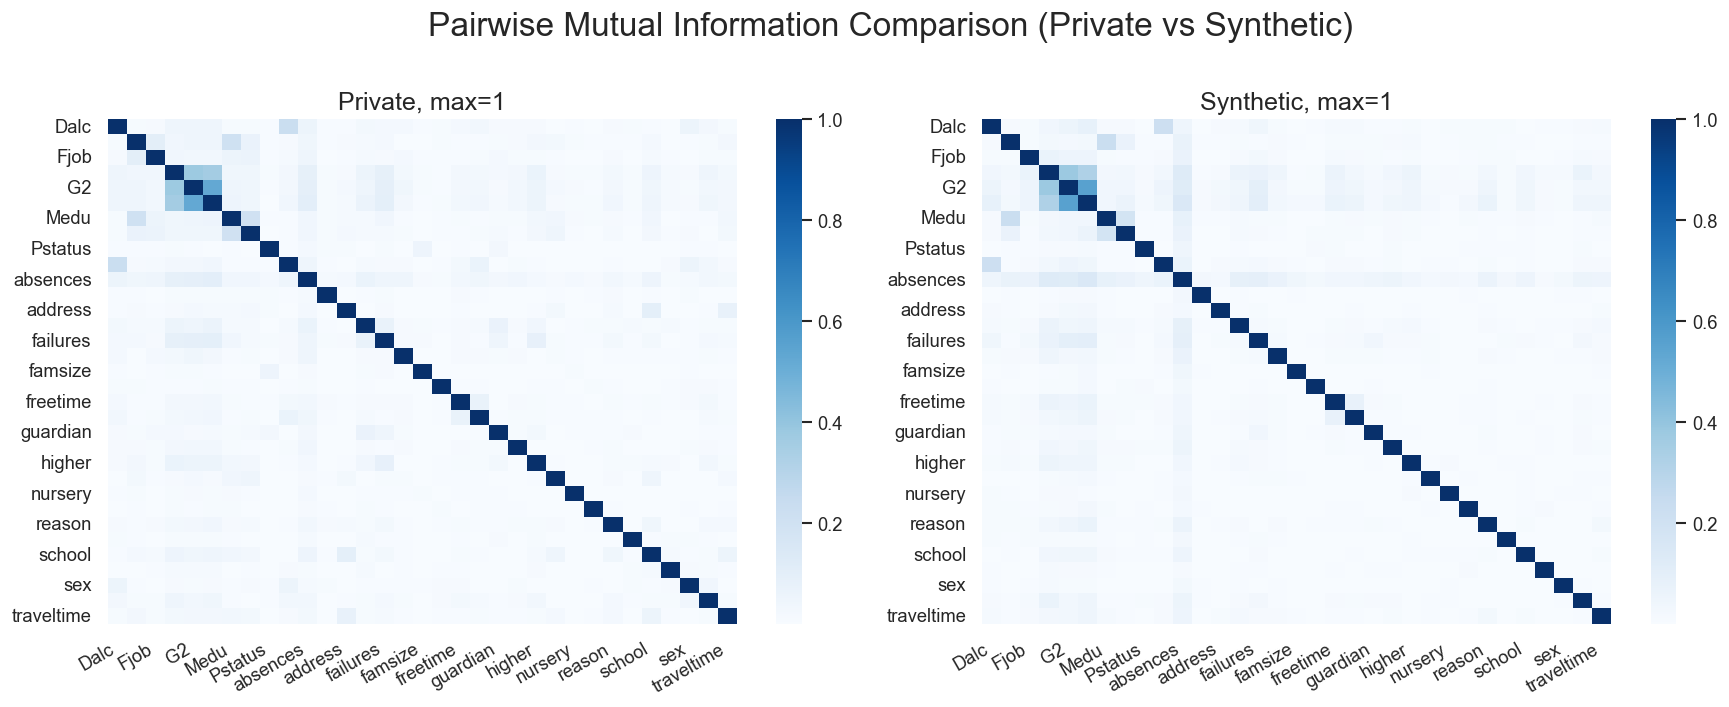

In [12]:
inspector.mutual_information_heatmap()